### Computation situation

In [7]:
agence_a_type = "fixed"
agence_a_percentage = 6 # in percent

agence_b_type = "stepwise"
agence_b_percentage = [10, 3] # in percent; before and after fixed price ("step")
agence_b_step_at = 100000 # in euros

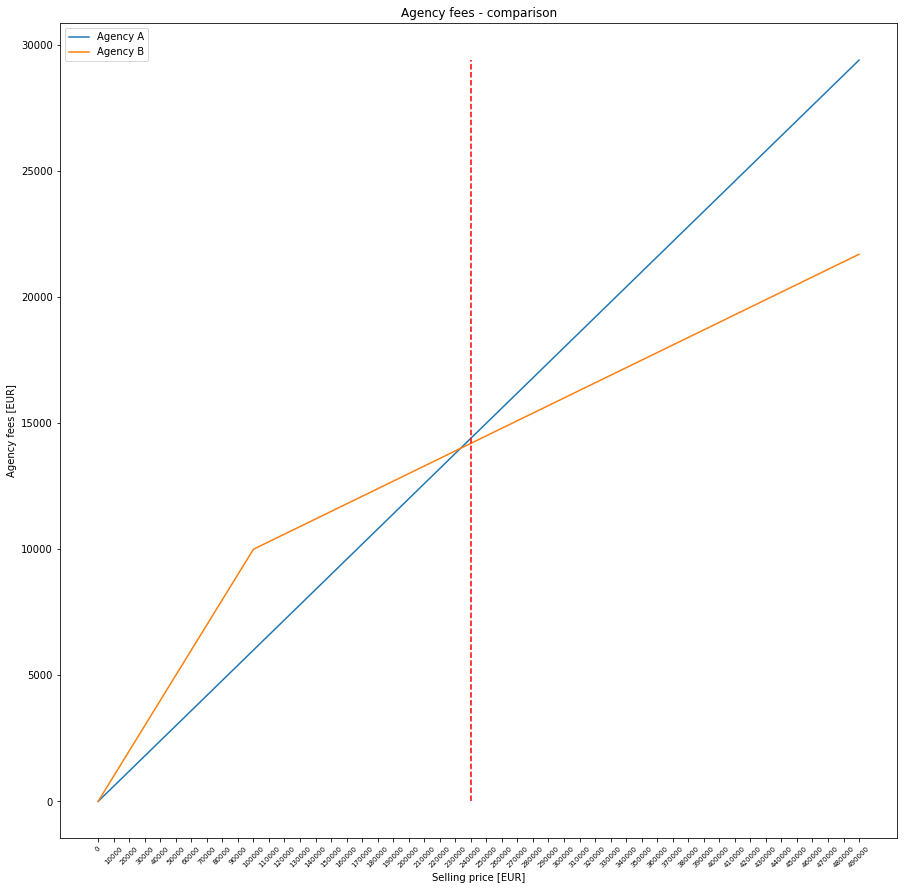

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def compute_fixed(price, perc):
    return (price * perc * 0.01)

def compute_stepwise(price, perc, step):
    if price < step:
        return (price * perc[0] * 0.01)
    else: 
        return (step * perc[0] * 0.01 + (price-step) * perc[1] * 0.01)

x = [i for i in range(0,5*10**5, 10000)]
y_a = [compute_fixed(p, agence_a_percentage) for p in x]
y_b = [compute_stepwise(p, agence_b_percentage, agence_b_step_at) for p in x]

fig, ax = plt.subplots(1, 1, figsize = (15,15))
ax.plot(x, y_a, label = "Agency A")
ax.plot(x, y_b, label = "Agency B")
ax.set_xlabel("Selling price [EUR]")
ax.set_ylabel("Agency fees [EUR]")
ax.vlines(x = x[np.where(np.array(y_a)>np.array(y_b))[0][0]], ymin = 0, ymax = max(y_a), colors = "red", linestyles="dashed")
ax.set_xticks(x)
ax.set_xticklabels(x, rotation = 45, size = 7)
plt.title("Agency fees - comparison")
plt.legend();